# Preprocessing
Thomas Tran

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io

In [2]:
import pickle

### This function goes through folder and changes the pixel values to individual class and saves all masks to a list

In [3]:
def change_pixels(folder,pixel_value,image_start,image_end,lst):
    lst_masks = list()
    for i in range(image_start,image_end):
        mask = io.imread(folder+lst[i])
        mask = np.where(mask>0,pixel_value,mask)
        lst_masks.append(mask)
    return lst_masks

### This function takes a list of labels and puts them all into one mask

In [4]:
def one_mask(images,size_row,size_column):
    output = np.zeros((size_row,size_column))
    for image in images:
        if len(image[np.where(image>0)])!=0:
            pixel = image[np.where(image>0)][0]
        else:
            pixel = 0
        output = np.where(image>0,pixel,output)
    return output

In [5]:
lst_folders = ['train/labels/double_plant/','train/labels/drydown/','train/labels/endrow/',
               'train/labels/nutrient_deficiency/','train/labels/planter_skip/','train/labels/storm_damage/',
               'train/labels/water/','train/labels/waterway/','train/labels/weed_cluster/']

In [6]:
dictionary = dict(zip(lst_folders,[i+1 for i in range(len(lst_folders))]))
dictionary

{'train/labels/double_plant/': 1,
 'train/labels/drydown/': 2,
 'train/labels/endrow/': 3,
 'train/labels/nutrient_deficiency/': 4,
 'train/labels/planter_skip/': 5,
 'train/labels/storm_damage/': 6,
 'train/labels/water/': 7,
 'train/labels/waterway/': 8,
 'train/labels/weed_cluster/': 9}

In [7]:
lst = os.listdir('train/labels/double_plant/')
len(lst)

8000

In [8]:
individual_mask = []

In [9]:
%%time
for f in lst_folders:
    adjusted_mask = change_pixels(f,dictionary[f],6000,8000,lst)
    individual_mask.append(adjusted_mask)

CPU times: user 37 s, sys: 9.59 s, total: 46.6 s
Wall time: 2min 30s


In [10]:
number_of_images = len(individual_mask[0])
number_of_labels = len(individual_mask)

In [11]:
%%time
all_mask = list()
for i in range(number_of_images):
    images=list()
    for j in range(number_of_labels):
        images.append(individual_mask[j][i])
    all_mask.append(one_mask(images,512,512))

CPU times: user 19 s, sys: 966 ms, total: 20 s
Wall time: 20 s


In [ ]:
%%time
with open('first_2000.pickle','rb') as file:
    first = pickle.load(file)
with open('2000-4000.pickle','rb') as file:
    second = pickle.load(file)
with open('4000-6000.pickle','rb') as file:
    third = pickle.load(file)
with open('6000-8000.pickle','rb') as file:
    fourth = pickle.load(file)

In [1]:
all_mask = first+second+third+fourth

NameError: name 'first' is not defined

In [ ]:
with open('all_mask.pickle','wb') as file:
    pickle.dump(all_mask,file)

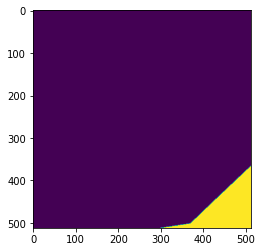

In [13]:
plt.imshow(all_mask[0])

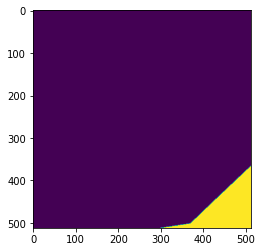

In [15]:
plt.imshow(test[0])